In [ ]:
#pip install nibabel

In [ ]:
pip install nilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.6 MB 9.5 MB/s 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
import nilearn
from nilearn import plotting
from nilearn import image
from nilearn.image import smooth_img
from nilearn.masking import compute_epi_mask
from nilearn.masking import apply_mask

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img_name = input('digite numero da imagem de treino: ') #escolher imagem
img = nib.load('/content/drive/MyDrive/MRI/Task01_BrainTumour/imagesTr/BRATS_' +img_name  + '.nii.gz',mmap = False) #carrega imagem 4d

header = img.get_header()
print("Formato da imagem", img.shape) #mostra o formato e o cabeçalho da imagem
print('Cabeçalho: \n', header)

digite numero da imagem de treino: 001
Formato da imagem (240, 240, 155, 4)
Cabeçalho: 
 <class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4 240 240 155   4   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.10'
aux_file        : b'none'
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: get_header method is deprecated.
Please use the ``img.header`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
  after removing the cwd from sys.path.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


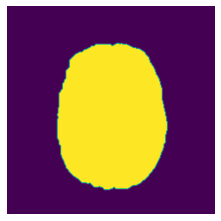

In [ ]:
mask_img = compute_epi_mask(img)
mask_data = mask_img.get_data().astype(bool)
#mostra máscara da imagem(cérebro e espaços vazios)

plt.figure(figsize=(3, 4))
plt.axis('off')
plt.imshow(np.rot90(mask_data[:, :, 80]), interpolation='bicubic')
plt.subplots_adjust(left=.02, bottom=.02, right=.98, top=.95)

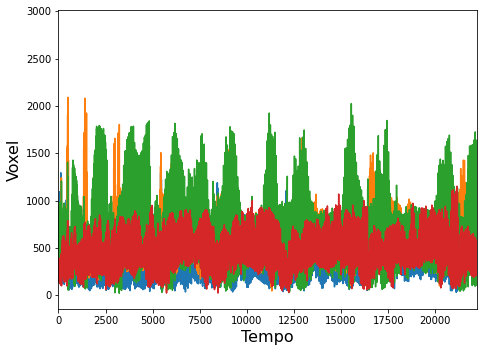

In [ ]:
masked_data = apply_mask(img, mask_img)
#serie temporal de 10 voxels
plt.figure(figsize=(7, 5))
plt.plot(masked_data[:10].T)
plt.xlabel('Tempo', fontsize=16)
plt.ylabel('Voxel', fontsize=16)
plt.xlim(0, 22200)
plt.subplots_adjust(bottom=.12, top=.95, right=.95, left=.12)
plt.show()

In [ ]:
def para_3d(img_4d): #recebe imagem 4d e devolve array numpy 3d
  imagem_data = img_4d.get_fdata()#dado da imagem em si
  img_3d = imagem_data[...,3] #imagem 3d em numpy array usando elipsis, 3 imagem em 4
  return img_3d

formato da imagem (240, 240, 155)


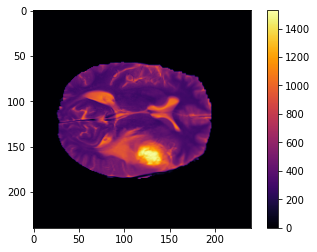

In [ ]:
img_3d=para_3d(img)
print('formato da imagem',img_3d.shape)
plt.imshow(img_3d[:, :, 77],cmap='inferno') 
plt.colorbar()

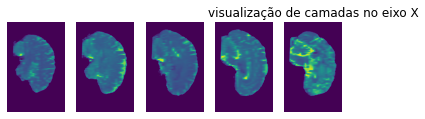

In [ ]:
#visualização no eixo X

fig, axes = plt.subplots(nrows=1,ncols=5)


indices =[80,90,100,110,120]
for i in range(5):
  cerebro = img_3d[indices[i],:,:]
  axes[i].imshow(cerebro)
  axes[i].axis('off')


plt.title('visualização de camadas no eixo X')
plt.show()

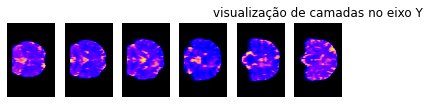

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=6)

indices =[60,70,80,90,100,110]
for i in range(6):
  cerebro = img_3d[:,indices[i],:]
  axes[i].imshow(cerebro,cmap='gnuplot2')
  axes[i].axis('off')


plt.title('visualização de camadas no eixo Y')
plt.show()

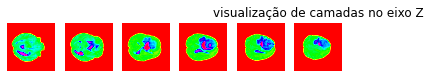

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=6)

indices =[60,70,80,90,100,110]
for i in range(6):
  
  cerebro = img_3d[:,:,indices[i]]
  axes[i].imshow(cerebro,cmap='hsv')
  axes[i].axis('off')


plt.title('visualização de camadas no eixo Z')
plt.show()

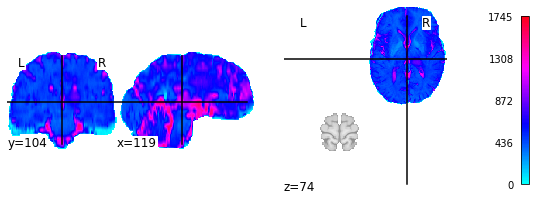

In [ ]:
#visualizações 3D com Nilearn
lista_3d = nib.four_to_three(img) #função four to three devolve uma lista das imagens 3d
plotting.plot_stat_map(lista_3d[3],cmap = 'hsv',cbar_tick_format= "%i") #statisc map

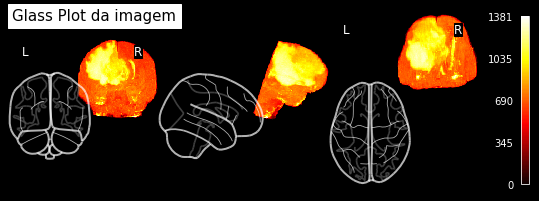

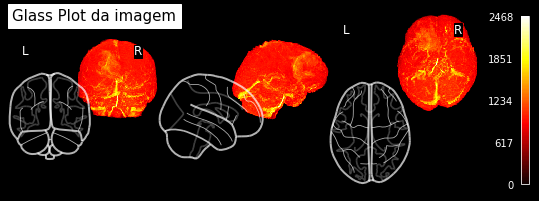

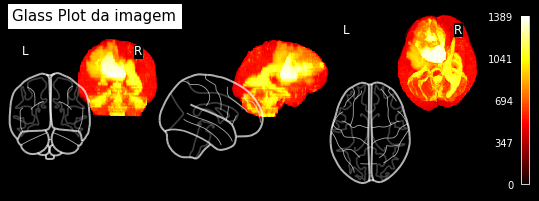

In [ ]:
#mostra as 4 imagens em 3d da 4 quarta dimensão
for i in range(4): 
  if i==1: #pula a segunda camada
    continue
  plotting.plot_glass_brain(lista_3d[i],title = 'Glass Plot da imagem',black_bg=True,colorbar=True,cbar_tick_format= "%i")   
#tumor é bem visível


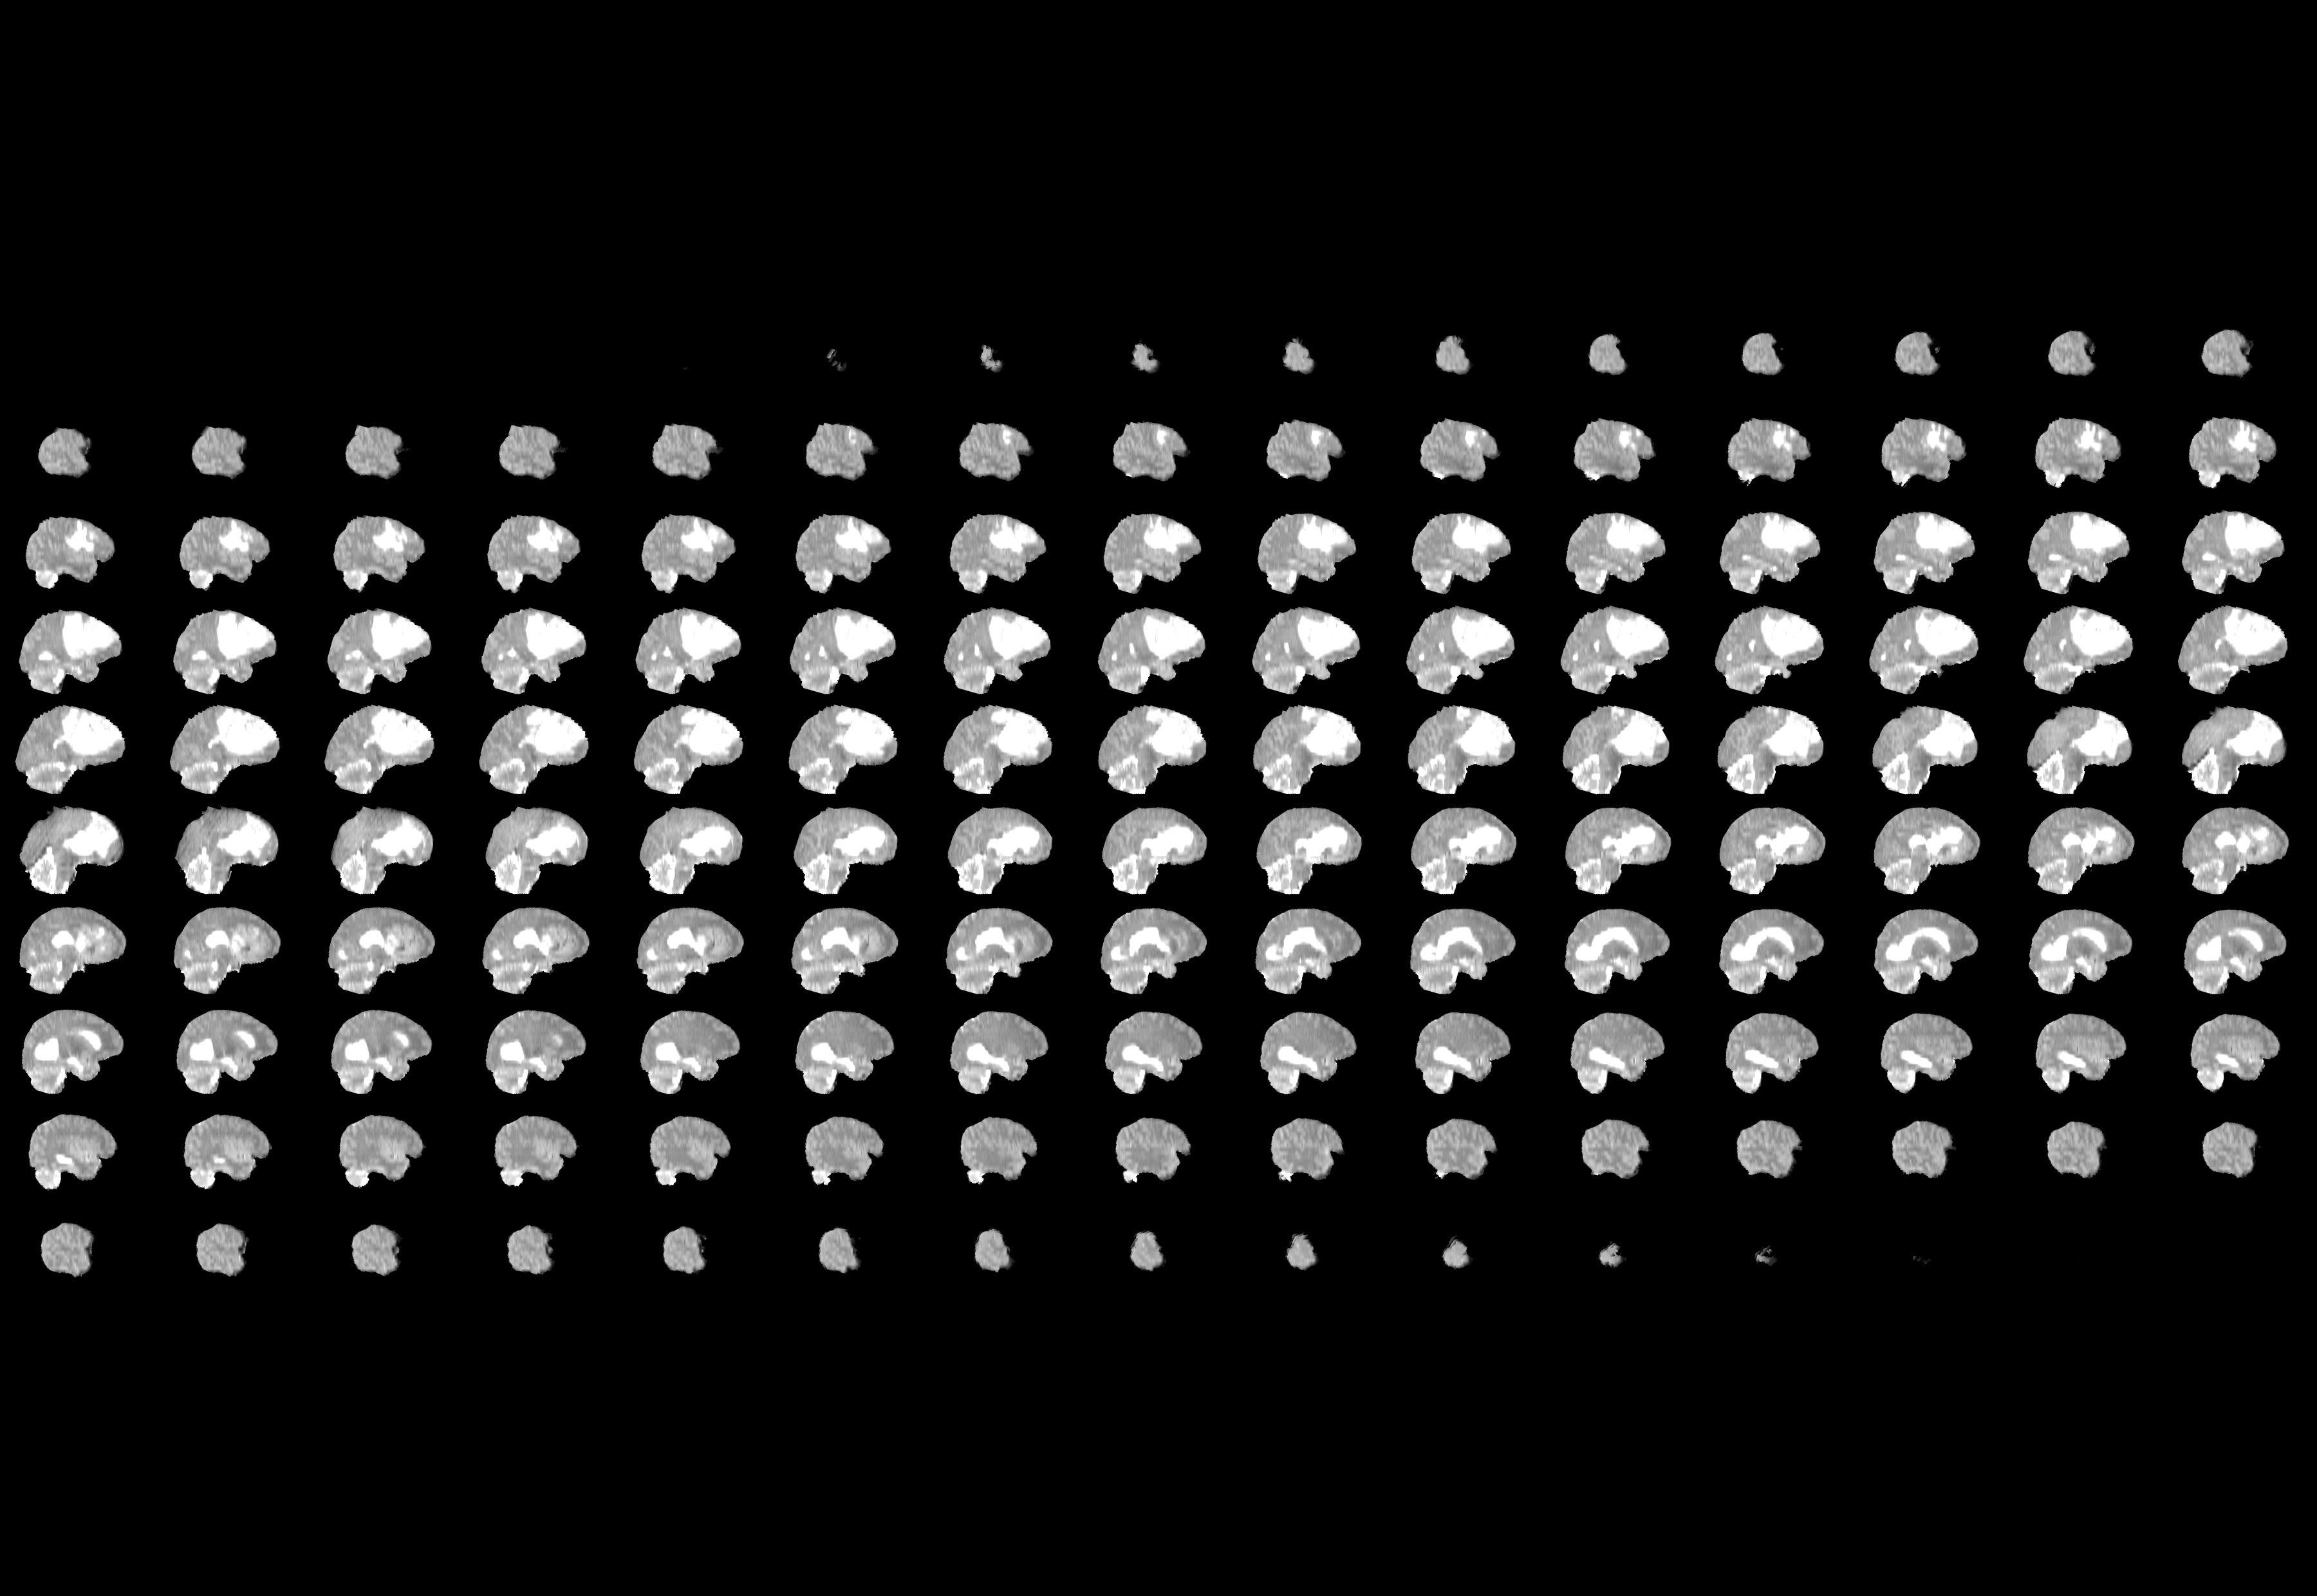
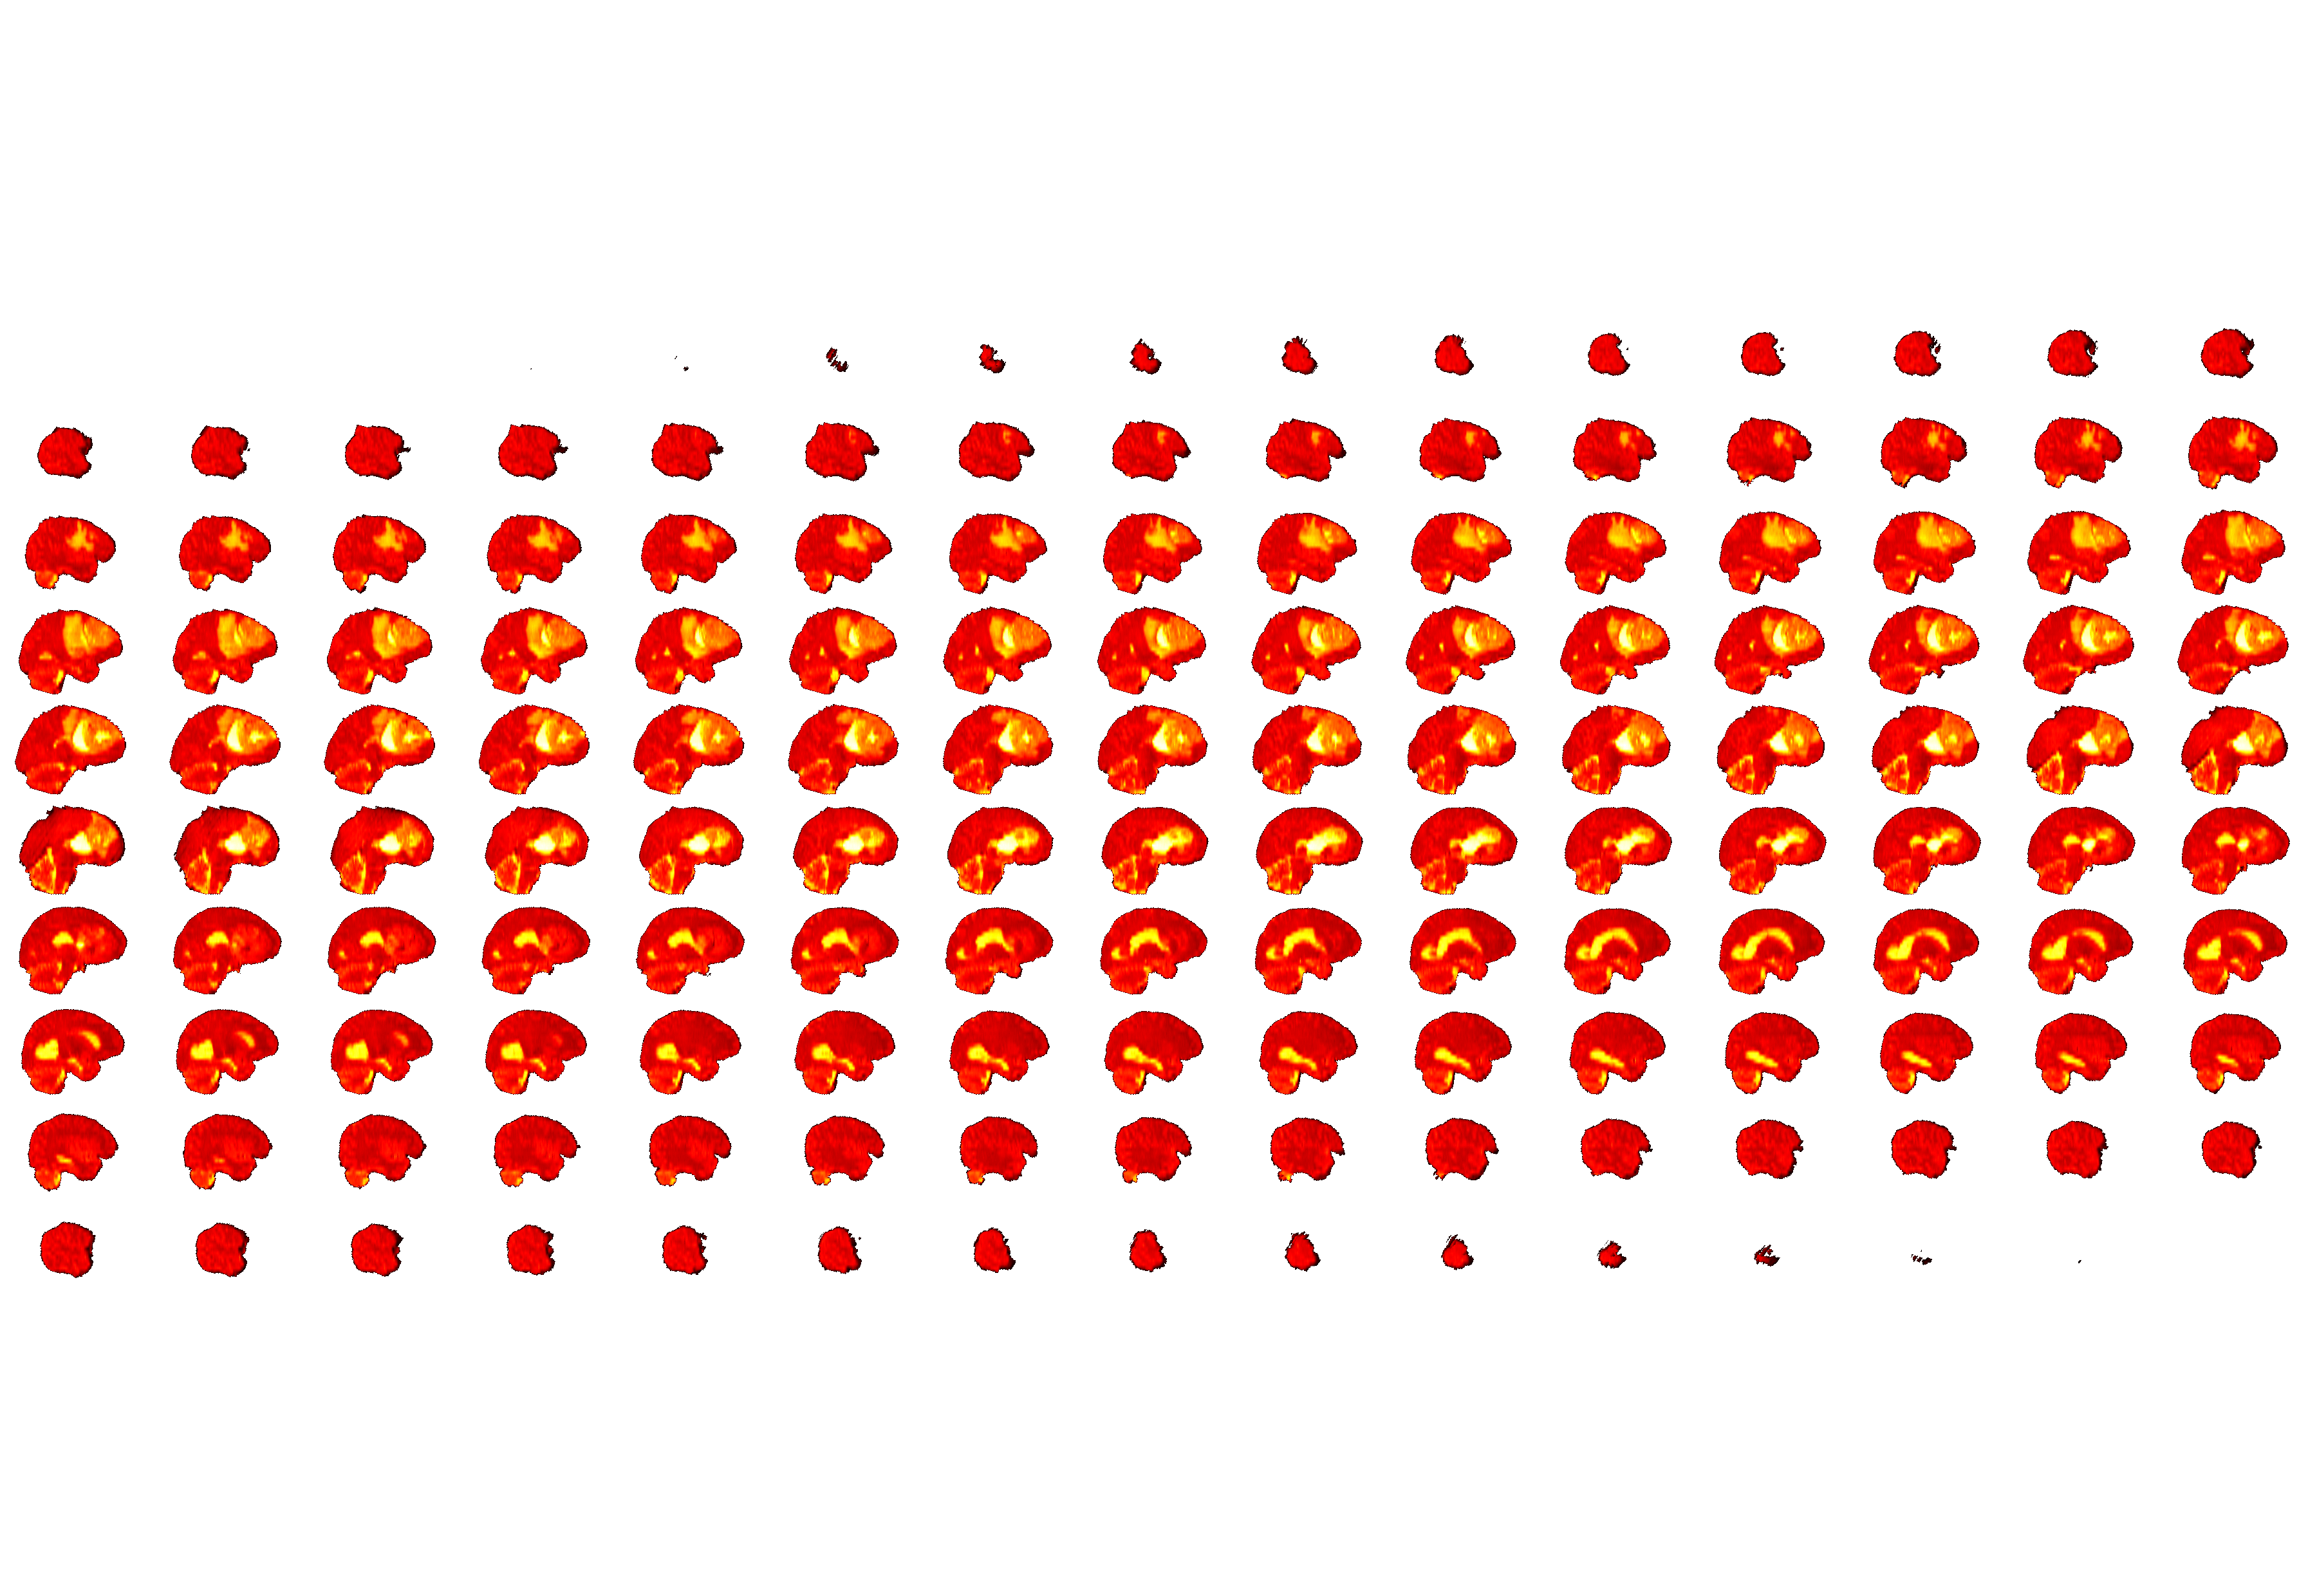

In [ ]:
from nilearn.plotting import view_img

view_img(lista_3d[3], bg_img=lista_3d[3],title="SVM hiperplano interativo", dim=-1,colorbar=True,cbar_tick_format= "%i")


TRABALHANDO COM O DATASET


In [ ]:
def gera_numero(numero): #recebe string de numero
    
    
    numero = str(int(numero) + 1)

    if len(numero) == 2:
        numero = '0' + numero

    elif len(numero) == 1:
        numero = '00' + numero

    return numero

In [ ]:
#LENDO ARQUIVOS TEXTO E SALVANDO LISTAS DE TREINO E TESTE NO DRIVE COM PICKLE
#SALVA EM FORMATO TEXTO
"""
x=[]
for i in range(15):
  with open(f'/content/drive/MyDrive/dir/img_treino/treino' + gera_numero(i),'r') as arquivo:
    treino = arquivo.readlines()
    treino = np.array(treino)
    
    x.append(treino)

y=[]
for i in range(15):
  with open(f'/content/drive/MyDrive/dir/labels/labelsTr' + gera_numero(i),'r') as arquivo:
    labels = arquivo.readlines()
    
    y.append(labels)

t=[]
for i in range(485,490):
  with open(f'/content/drive/MyDrive/dir/img_teste/teste' + gera_numero(i),'r') as arquivo:
    teste = arquivo.readlines()
    
    t.append(teste)    """

In [ ]:
x=[]
y=[]
z=[]

In [ ]:
#salva dados de treino(x), labels(y) e teste(t) em listas para salvar com pickle posteirormente

treino=[]
labels=[]
teste=[]
for i in range(5):
  img_name = gera_numero(i)
  img = nib.load('/content/drive/MyDrive/MRI/Task01_BrainTumour/imagesTr/BRATS_' +img_name  + '.nii.gz')#.get_data()[:,:,:,0].astype(int)
  mask_img = compute_epi_mask(img)
  mask_data = mask_img.get_data().astype(bool)
  treino.append(mask_data)
  x = np.asarray(treino)   
  



for i in range(5):
  img_name = gera_numero(i)
  img = nib.load('/content/drive/MyDrive/MRI/Task01_BrainTumour/labelsTr/BRATS_' +img_name  + '.nii.gz')
  img = img.get_data().astype(bool)
  labels.append(img)
  y = np.asarray(labels)
  



for i in range(485,487):
  img_name = gera_numero(i)
  img = nib.load('/content/drive/MyDrive/MRI/Task01_BrainTumour/imagesTs/BRATS_' +img_name  + '.nii.gz')#.get_data()[:,:,:,0]
  mask_img = compute_epi_mask(img)
  mask_data = mask_img.get_data().astype(bool)
  teste.append(mask_data)
  t = np.asarray(teste)
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() 

TESTES PICKLE

In [ ]:
import pickle

In [ ]:
#SALVA LISTAS COM PICKLE, LÊ E RETORNA LISTA PARA USAR POSTERIORMENTE EM TREINO E TESTE
#Recebe como parâmetros uma lista e o nome do arquivo a ser salvo
#salvar no drive apenas uma vez, ler sempre que for rodar o código
def salva_pickle(lista,nome_arquivo):
  with open('/content/drive/MyDrive/pickle_file/'+ nome_arquivo +'.pkl','wb') as arquivo:
    pickle.dump(lista,arquivo)

def le_pickle(lista,nome_arquivo):
  with open('/content/drive/MyDrive/pickle_file/'+ nome_arquivo +'.pkl','rb') as arquivo:
    lista = pickle.load(arquivo)
    return lista    

In [ ]:
def le_clf(nome_arquivo):
  with open('/content/drive/MyDrive/pickle_file/'+ nome_arquivo +'.pkl','rb') as arquivo:
    lista = pickle.load(arquivo)
    return lista    

In [ ]:
#APENAS UMA VEZ
salva_pickle(t,'testes') 
salva_pickle(x,'x_treino')
salva_pickle(y,'y_labels')

In [ ]:
#Reinicia listas e lê dados do drive salvos 
treino = 0
labels = 0
teste=0

x = le_pickle(treino,'x_treino')#4d
y = le_pickle(labels,'y_labels')#3d não é necessário reduzir agora
t = le_pickle(teste,'testes')#4d

In [ ]:
#x,t,y = x.reshape(5,240*240*155),t.reshape(2,240*240*155),y.reshape(5,240*240*155)#dados com 2 dimensões
x.shape,y.shape,t.shape

((5, 240, 240, 155), (5, 240, 240, 155), (2, 240, 240, 155))

In [ ]:
x = x.reshape(5,240*240*155)
y= y.reshape(5,240* 240* 155)
t = t.reshape(2,240* 240* 155)

ALGORITMO SVM


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
clf_arvore = DecisionTreeClassifier( max_depth =3)
regr = SVR()
clf = svm.SVC(kernel = 'rbf', gamma = 'auto')
lin = SVC(kernel = 'linear')


In [ ]:
y=y.reshape(8928000*5)

In [ ]:
x=x.reshape(8928000*5)

In [ ]:
y=y.reshape(5,8928000)

In [ ]:
x=x.reshape(-1,8928000)

In [ ]:
n_estimators=8928000

In [ ]:
#clf = OneVsRestClassifier(BaggingClassifier(SVC(kernel='rbf',C=4, probability=True, class_weight='balanced'),max_samples=n_estimators,n_estimators=n_estimators) )


In [ ]:
clf.fit(x, y)

In [ ]:
score = clf.score(x,y)*100
print("taxa de acerto %d%%" %score)

taxa de acerto 98%


In [ ]:
def blocks_from_images(init,end):
  blocks=[]
  results=[]
  for digit in range(init,end):
    treino = '/content/drive/MyDrive/MRI/Task01_BrainTumour/imagesTr/BRATS_' +gera_numero(digit)  + '.nii.gz'
    label = '/content/drive/MyDrive/MRI/Task01_BrainTumour/labelsTr/BRATS_' +gera_numero(digit)  + '.nii.gz'
    img_treino = nib.load(treino).dataobj[:,:,:,0]
    img_label = nib.load(label).dataobj[:,:,:]

    for i in range(35,205):
      for j in range(35,205):
        for k in range(38,122):
          block = np.array([np.array(img_treino[i:i+2,j:j+2,k:k+2]/255, dtype=np.uint8)]).reshape(8)
          if 0 not in block:
            blocks.append(block)
            if 0 in (np.array([img_label[i:i+2,j:j+2,k:k+2]/255]).reshape(8)):
              results.append(False)
            else:
              results.append(True)
  return np.array(blocks,dtype =np.uint8),np.array(results)


In [ ]:
blocos,resultados = blocks_from_images(0,10)
blocos = salva_pickle(blocos,'blocos')
resultados = salva_pickle(resultados,'resultados')

In [ ]:
resultados = []
blocos = []
resultados=le_pickle(resultados,'resultados')
blocos = le_pickle(blocos,'blocos')

False

In [ ]:
from sklearn.svm import SVC
clf = SVC()
fit = clf.fit(blocos,resultados)
salva_pickle(fit,"arquivo_fit")

In [ ]:
blocos_teste,resultados_teste = blocks_from_images(11,15)
predicts_teste = clf.score(blocos_teste,resultados_teste)